# 1. Basic Setup

In [62]:
# Loading the libraries:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [35]:
# Loading the dataset:
df = pd.read_csv('Hotel Reservations.csv')

In [36]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# 2. Data Cleaning

In [38]:
# We are lucky! This dataset doesn't have missing values:
missing_values = df.isnull().sum()
print(missing_values)

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [41]:
# Checking for duplicate rows:
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display the duplicate rows (if any):
if duplicate_rows.shape[0] > 0:
    print(duplicate_rows)

Number of duplicate rows: 0


# 3. Exploratory Data Analysis

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [43]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


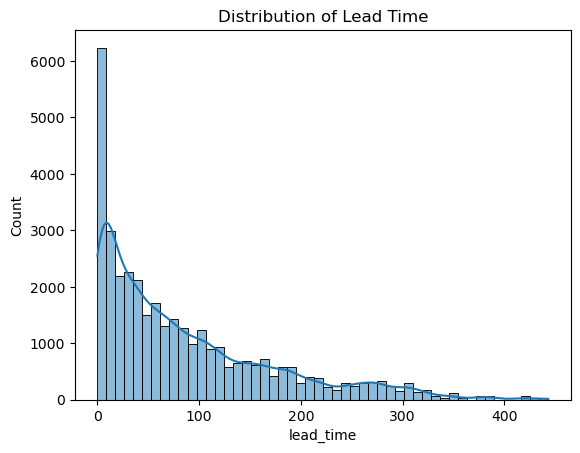

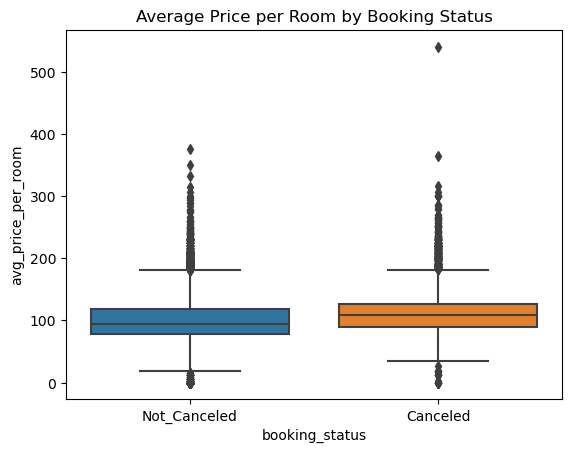

In [47]:
# Visualizating the distribution of key variables:

sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title('Distribution of Lead Time')
plt.show()

sns.boxplot(x='booking_status', y='avg_price_per_room', data=df)
plt.title('Average Price per Room by Booking Status')
plt.show()

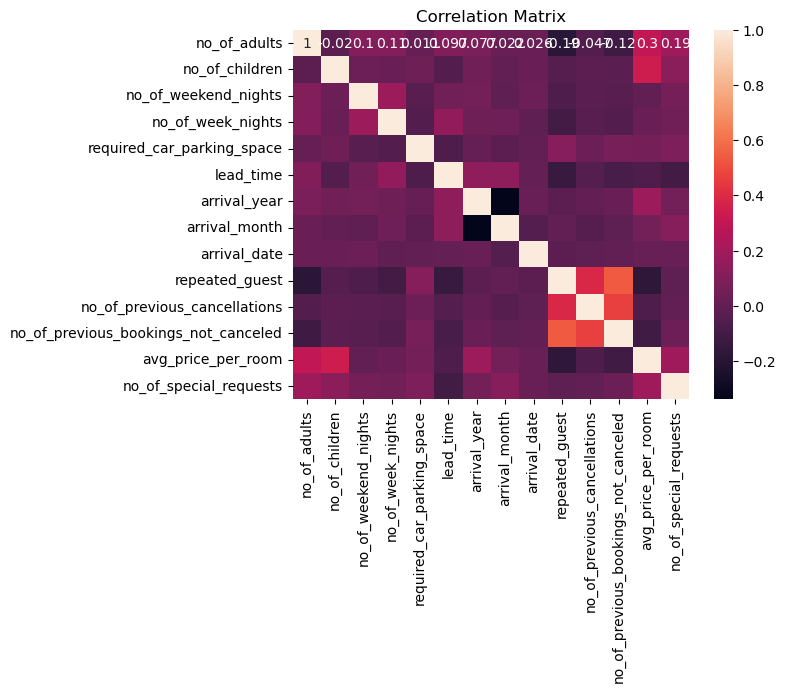

In [56]:
# Select only numeric columns for correlation
numeric_data = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

**Positive Correlations:**

- There is a moderate positive correlation between `no_of_adults` and `avg_price_per_room` (0.297), indicating that as the number of adults increases, the average price per room tends to increase.
- Similarly, `no_of_children` also has a moderate positive correlation with `avg_price_per_room` (0.338).
- `no_of_weekend_nights` and `no_of_week_nights` have a slight positive correlation with `no_of_adults` and `no_of_children`, suggesting that longer stays may involve more guests.

**Negative Correlations:**

- There is a negative correlation between `lead_time` and `avg_price_per_room` (-0.063), indicating that longer lead times may be associated with lower average prices per room.
- `repeated_guest` has a negative correlation with `avg_price_per_room` (-0.175), suggesting that repeated guests may receive discounts or prefer cheaper rooms.

**Other Insights:**

- `no_of_previous_cancellations` and `no_of_previous_bookings_not_canceled` are positively correlated (0.468), indicating that customers who have previously canceled bookings tend to have more bookings that were not canceled.
- There is a positive correlation between `repeated_guest` and `no_of_previous_bookings_not_canceled` (0.539), indicating that repeated guests tend to have more bookings that were not canceled.


In [58]:
cancellation_rate = df['booking_status'].value_counts(normalize=True)
print(cancellation_rate)

booking_status
Not_Canceled    0.672364
Canceled        0.327636
Name: proportion, dtype: float64


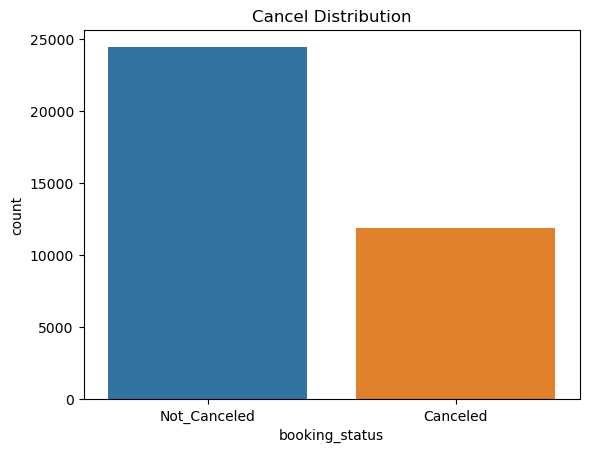

In [53]:
# Visualización de la distribución de cancelaciones
sns.countplot(x='booking_status', data=df)
plt.title('Cancel Distribution')
plt.show()

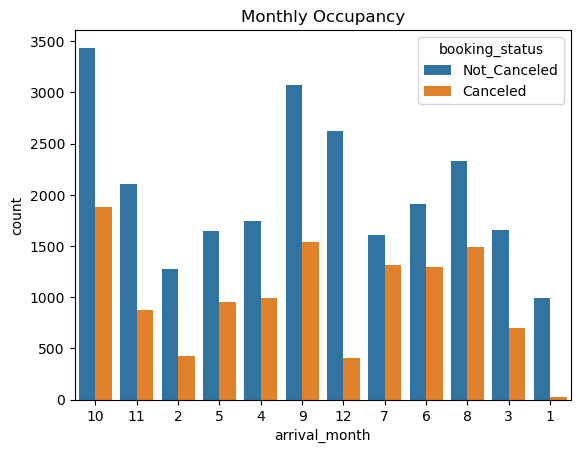

In [46]:
# Visualización de la ocupación por mes
data['arrival_month'] = data['arrival_month'].astype(str)  # Convertir a string para mejor visualización
sns.countplot(x='arrival_month', hue='booking_status', data=data)
plt.title('Monthly Occupancy')
plt.show()

# 4. Adding new features

In [59]:
# Creating new features:
df['total_nights'] = df['no_of_weekend_nights'] + df['no_of_week_nights']


In [60]:
# Converting categorical variables:
df = pd.get_dummies(df, columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type'])

# 5. Modeling

In [63]:
# Split the data:

X = df.drop(['Booking_ID', 'booking_status'], axis=1)
y = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
model = RandomForestClassifier(n_estimators=1000, random_state=8)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      4839
           1       0.89      0.82      0.85      2416

    accuracy                           0.91      7255
   macro avg       0.90      0.89      0.89      7255
weighted avg       0.91      0.91      0.91      7255

[[4593  246]
 [ 430 1986]]
